# Exploratory Data Analysis

This notebook contains all the exploratory data Analysis

### Project description: Predicting risk of developing depression and anxiety in Spain

The following project employs data from the Spain's 2020 European Health Survey (EHS). The Spain's EHS aims to provide information about the overall health status of Spain's population regarding cronic diseases or accidents, limitations to complete daily activities, access and use of health care services, as well as environmental characteristics and daily life-habits that may represent a health risk. The **key variable** is **dep_anx**, a tranformed binary variable, taking value 1 if the participant has suffered depression or anxiety.
 
Source: https://www.ine.es/dyngs/INEbase/operacion.htm?c=Estadistica_C&cid=1254736176784&menu=resultados&idp=1254735573175#!tabs-1254736195745

##### Imports

In [381]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import textwrap
from sklearn.feature_selection import chi2, SelectKBest, f_classif
from sklearn.model_selection import train_test_split


Import the modified dataframe from the data cleaning notebook


In [382]:
RUTA_DATAFRAME = '../data/interim/df_final.csv'

df = pd.read_csv(RUTA_DATAFRAME, sep=',')

In [383]:
df.head(5)

,CCAA,SEXOa,EDADa,E1_1,E1C,E1E,E2_1a,E2_1b,E4,E4b,...,W127,X130,X131,X132,Y133,CLASE_PR,IMC,SEVERIDAD_DEPRESIVA,CUADROS_DEPRESIVOS,dep_anx
0,16.0,1.0,60.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,...,6.0,4.0,1.0,2.0,0,5.0,2.0,1.0,3.0,0
1,16.0,2.0,87.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,...,8.0,3.0,1.0,2.0,0,1.0,9.0,3.0,3.0,0
2,16.0,1.0,38.0,1.0,1.0,1.0,1.0,2.0,3.0,2.0,...,4.0,4.0,1.0,4.0,0,4.0,3.0,3.0,2.0,0
3,16.0,2.0,43.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,...,3.0,2.0,1.0,2.0,1,1.0,2.0,1.0,3.0,0
4,16.0,1.0,41.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,...,9.0,4.0,1.0,5.0,0,4.0,3.0,1.0,3.0,0


The modified dataframe contains rows: 22072, columns : 342

In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22072 entries, 0 to 22071
Columns: 273 entries, CCAA to dep_anx
dtypes: float64(61), int64(212)
memory usage: 46.0 MB


Creating a copy of the imported dataframe to preserve it as more modifications will be conducted:

In [385]:
clean_df = df.copy()

## Loading Json dictionary file


On the notebook json_maker.ipynb we created a json dictionary file 'full_var_dict.json' containing the original variable name, a descriptive variable name, as well as a brief description of each of the variable values. The goal of this file is to ease the EDA and to produce graphs easier to read and understand with informative titles and descriptions of the categories of each variable.

In [386]:
# JSON file source
ruta_json = "../data/json_files/full_var_dict.json"

# loading JSON file
with open(ruta_json, 'r') as archivo:
    varijson = json.load(archivo)

Example of how the JSON file looks: this is the dictionary of the variable CCAA

In [387]:
varijson['CCAA']

{'diccionario': {'01': 'Andalucía',
  '02': 'Aragón',
  '03': 'Asturias, Principado de',
  '04': 'Balears, Illes',
  '05': 'Canarias',
  '06': 'Cantabria',
  '07': 'Castilla y León',
  '08': 'Castilla - La Mancha',
  '09': 'Cataluña',
  '10': 'Comunitat Valenciana',
  '11': 'Extremadura',
  '12': 'Galicia',
  '13': 'Madrid, Comunidad de',
  '14': 'Murcia, Región de',
  '15': 'Navarra, Comunidad Foral de',
  '16': 'País Vasco',
  '17': 'Rioja, La',
  '18': 'Ceuta',
  '19': 'Melilla'},
 'Descripción': 'Comunidad Autónoma de residencia'}

This function will be applied to the EDA graphs. It parses the JSON file to recover a descriptive variable name (e.g., title), the category values of a variable (e.g., values), and the actual category names inside a variable (e.g., categories)

In [388]:

def parse_json(columna):
    categories = list(varijson[columna]['diccionario'].values())
    categories = [str(cat) for cat in categories]

    values=list(varijson[columna]['diccionario'].keys())
    values = [int(cat) for cat in values]
    
    title = varijson[columna]['Descripción']

    return values, categories, title

## Univariate analysis

## Demographic information

*   More than 50% of the sample are women
*   Over 80% of participants have Spanish nationality
*   Roughly 27% of participants are single and about 50% are married
*   About 70% mention that their health in the last 12 months has been very good or good

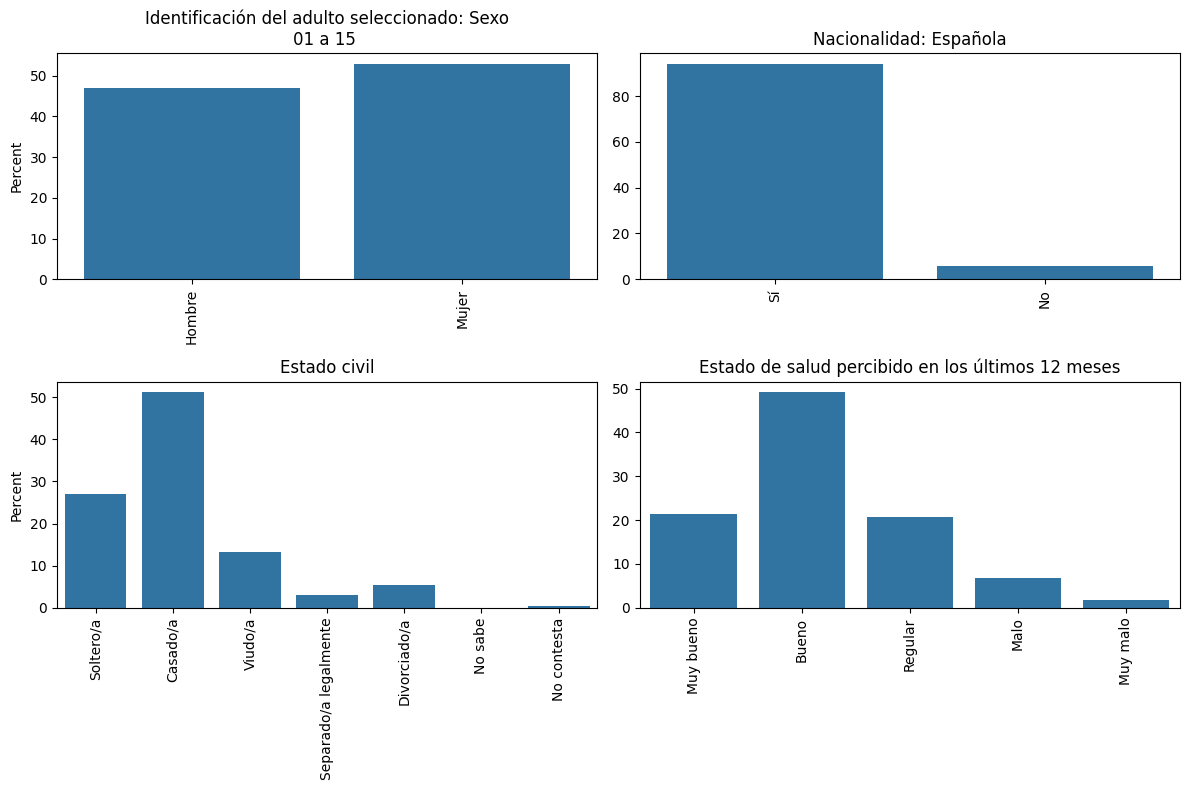

In [389]:
vars=['SEXOa','E2_1a', 'E4b', 'G21']
cols=2
rows=((len(clean_df[vars].columns) - 1) // cols) + 1
fig, axis = plt.subplots(rows, cols, figsize=(12, rows * 4))

for col, ax in zip(clean_df[vars].columns , axis.flatten()):
  values, categories, title= parse_json(col)
  sns.countplot(data=clean_df, x=col, ax=ax, stat='percent')
  ax.set_title(title)
  ax.set_ylabel('')
  ax.set_xlabel('')
  ax.set_xticks(range(len(values)))
  ax.set_xticklabels(categories,  rotation=90)

axis[0,0].set_ylabel('Percent')
axis[1,0].set_ylabel('Percent')


#removing empty subplots
for i in range(len(clean_df[vars]), len(axis.flatten())):
      fig.delaxes(axis.flatten()[i])

plt.tight_layout()
plt.show()

In [390]:
def plot_single_numerical_variable(dataframe, column):

    fig, axis = plt.subplots(2, 1, figsize=(8, 4), gridspec_kw={'height_ratios': [6, 1]})

    # Calcula la media, mediana y desviación estándar de los datos
    media = np.mean(dataframe[column])
    mediana = np.median(dataframe[column])
    desviacion_estandar = np.std(dataframe[column])

    # Crear una figura múltiple con histogramas y diagramas de caja
    sns.histplot(ax=axis[0], data=dataframe, kde=True, x=column).set(xlabel=None)
    axis[0].axvline(media, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {media:.2f}' )
    axis[0].axvline(mediana, color='orange', linestyle='dashed', linewidth=1, label=f'Median: {mediana:.2f}')
    axis[0].axvline(media + desviacion_estandar, color='green', linestyle='dashed', linewidth=1, label=f'Standard Deviation: {desviacion_estandar:.2f}')
    axis[0].axvline(media - desviacion_estandar, color='green', linestyle='dashed', linewidth=1)

    sns.boxplot(ax=axis[1], data=dataframe, x=column).set(xlabel=None)
    axis[1].axvline(media, color='red', linestyle='dashed', linewidth=1, label='Mean')
    axis[1].axvline(mediana, color='orange', linestyle='dashed', linewidth=1, label='Median')
    axis[1].axvline(media + desviacion_estandar, color='green', linestyle='dashed', linewidth=1)
    axis[1].axvline(media - desviacion_estandar, color='green', linestyle='dashed', linewidth=1)

    axis[0].legend()

    fig.suptitle(column)

    # Ajustar el layout
    plt.tight_layout()

    # Mostrar el plot
    plt.show()

# Uso del código
# Supongamos que 'data' es tu DataFrame y 'variable' es la columna que deseas graficar
# plot_single_numerical_variable(data, 'variable')


Participants are on average 55 years old and most of them are between 35 and 75 years old, approximately

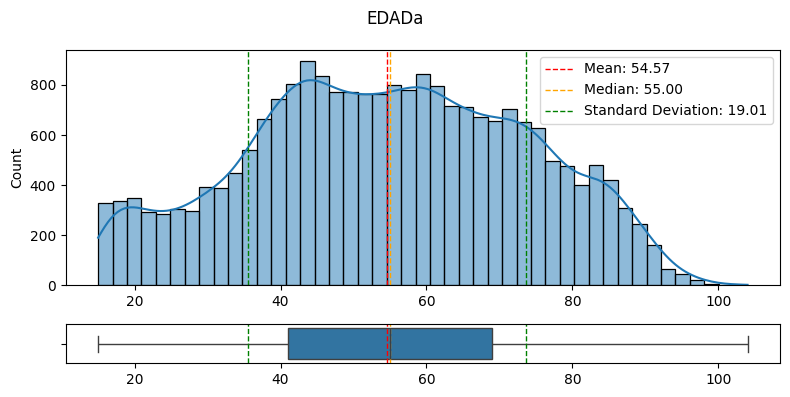

In [391]:
plot_single_numerical_variable(clean_df, 'EDADa')

Most participants live in the communities of Andalucia, Catalonia and Madrid

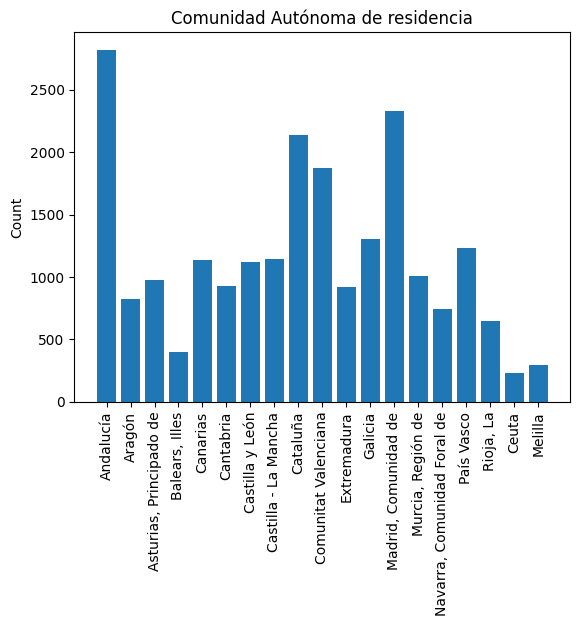

In [392]:
var_x = 'CCAA'

# Obtén los valores únicos y sus recuentos
counts = clean_df[var_x].value_counts()

values, categories, title= parse_json(var_x)

# Crea el gráfico de barras
plt.bar(counts.index, counts.values)

# Personaliza el gráfico
plt.xlabel('')
plt.ylabel('Count')
plt.title(title)

plt.xticks(values, categories, rotation = 90)

# Muestra el gráfico
plt.show()

## Life habits

**Comsumption of fast food and fruits:**
* More than 60% of participants report eating fast food less than once a week or never
* About 70% of participants report eating fruit one or more times per day

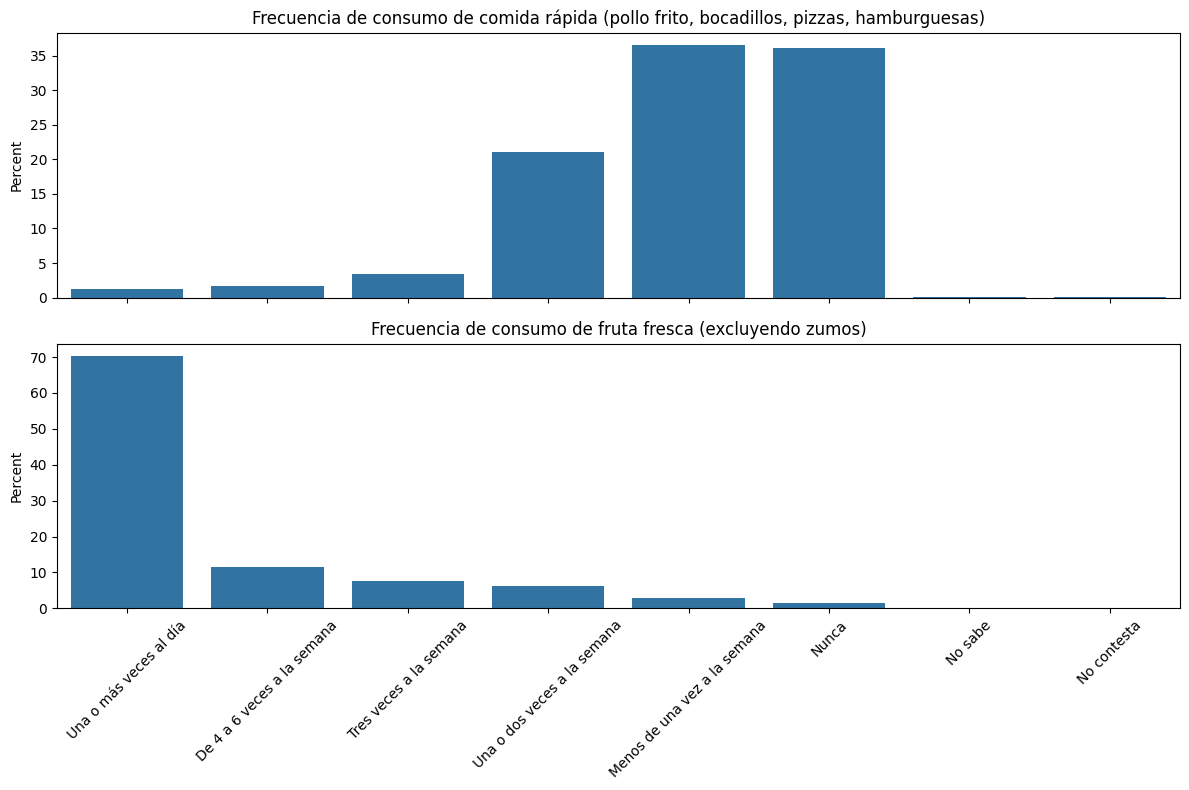

In [393]:
vars=['U120_13', 'U120_1']
cols=1
rows=((len(clean_df[vars].columns) - 1) // cols) + 1
fig, axis = plt.subplots(rows, cols, figsize=(12, rows * 4))

for col, ax in zip(clean_df[vars].columns , axis.flatten()):
  values, categories, title= parse_json(col)
  sns.countplot(data=clean_df, x=col, ax=ax, stat='percent')
  ax.set_title(title)
  ax.set_ylabel('Percent')
  ax.set_xlabel('')

axis[1].set_xticks(range(len(values)))
axis[1].set_xticklabels(categories,  rotation=45)  
axis[0].set_xticklabels('') 

#removing empty subplots
for i in range(len(clean_df[vars]), len(axis.flatten())):
      fig.delaxes(axis.flatten()[i])

plt.tight_layout()
plt.show()

**Smoking**
* The majority of participants report the have never smoked 

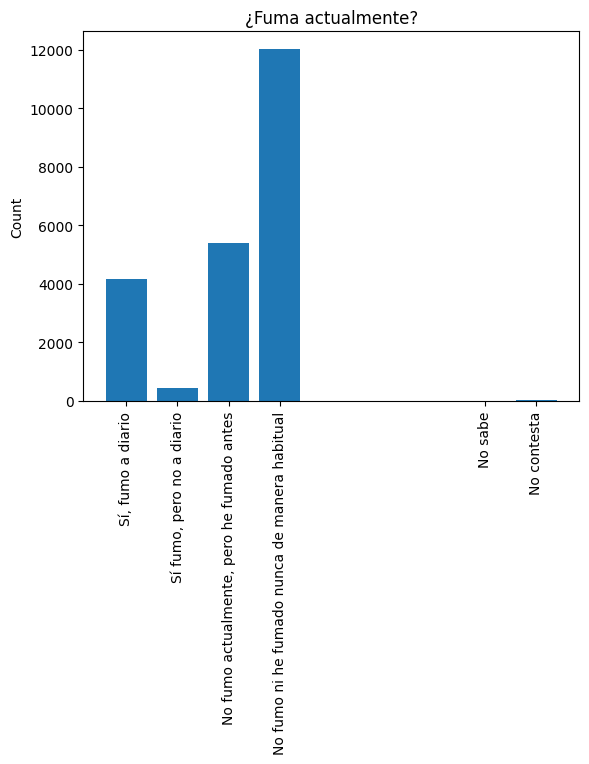

In [394]:
var_x = 'V121'

# Obtén los valores únicos y sus recuentos
counts = clean_df[var_x].value_counts()

values, categories, title= parse_json(var_x)

# Crea el gráfico de barras
plt.bar(counts.index, counts.values)

# Personaliza el gráfico
plt.xlabel('')
plt.ylabel('Count')
plt.title(title)


plt.xticks(values, categories, rotation = 90)

# Muestra el gráfico
plt.show()

## Depression/Anxiety-related variables

**Target variable: 'dep_anx'**

*  Approximately 10% of the partcipants report ever suffering from depression or anxiety

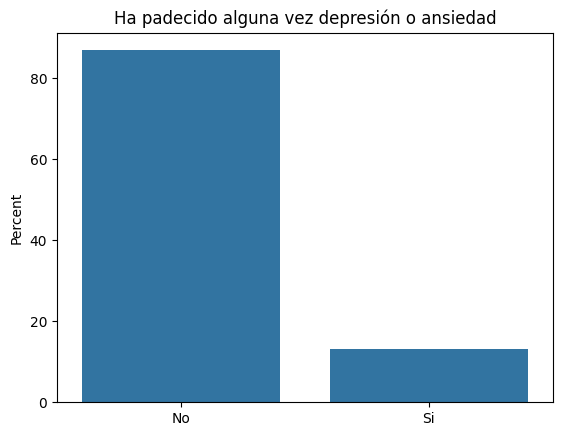

In [395]:
var_x = 'dep_anx'

# Crea el gráfico de barras
sns.countplot(data=clean_df, x='dep_anx', stat='percent')

# Personaliza el gráfico
plt.xlabel('')
plt.ylabel('Percent')
plt.title('Ha padecido alguna vez depresión o ansiedad')

plt.xticks([0,1], ['No','Si'])

# Muestra el gráfico
plt.show()

**Ever consumed antidepressants or tranquilizers:**

*   Approximately 5% of participants report ever taken NOT prescribed antidepressants 
*   Approximately 5% of participants report ever taken prescribed antidepressants 
*   Approximately 10% of participants report ever taken NOT prescribed tranquilizers
*   Approximately 10% of participants report ever taken prescribed tranquilizers 

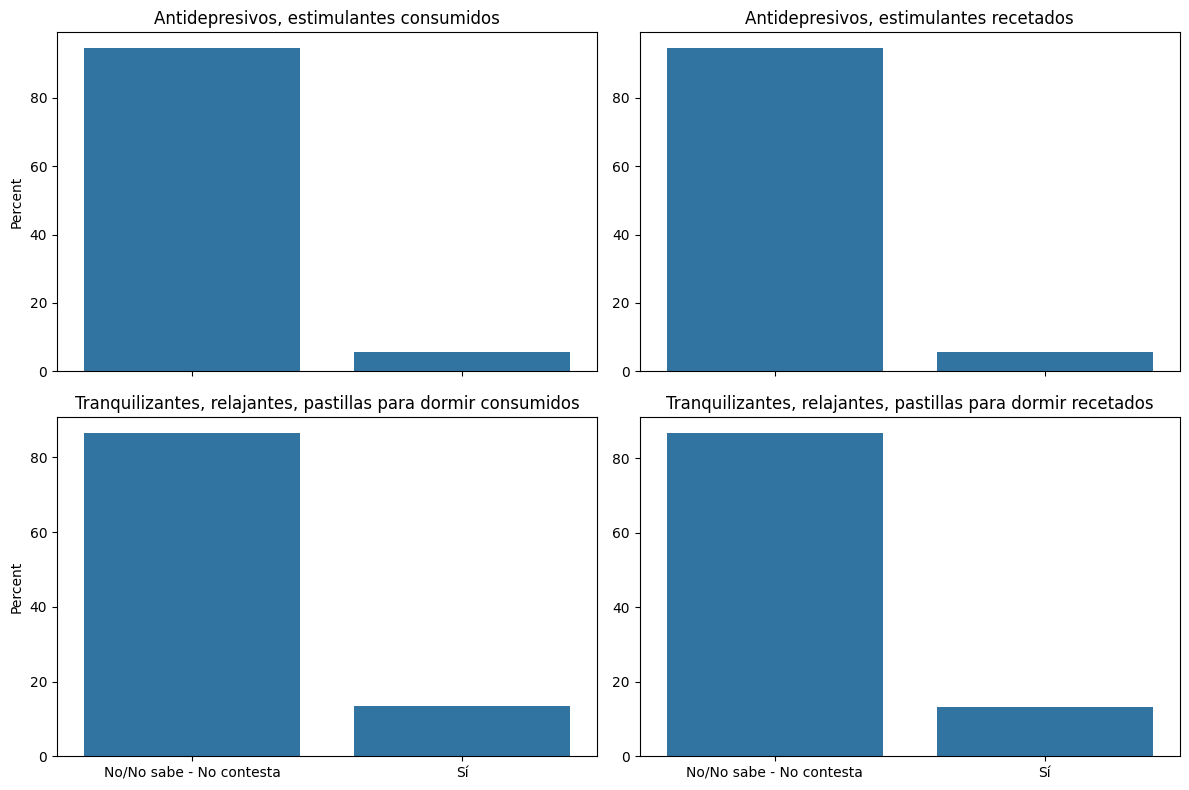

In [396]:
vars=['P87_14a', 'P87_14b', 'P87_7a', 'P87_7b']
cols=2
rows=((len(clean_df[vars].columns) - 1) // cols) + 1
fig, axis = plt.subplots(rows, cols, figsize=(12, rows * 4))
for col, ax in zip(clean_df[vars].columns , axis.flatten()):
  values, categories, title= parse_json(col)
  sns.countplot(data=clean_df, x=col, ax=ax, stat='percent')
  ax.set_title(title)
  ax.set_ylabel('')
  ax.set_xlabel('')
  ax.set_xticks(values)
  ax.set_xticklabels(categories)  

axis[0,0].set_ylabel('Percent')
axis[1,0].set_ylabel('Percent')
axis[0,0].set_xticklabels('')  
axis[0,1].set_xticklabels('')  

#removing empty subplots
for i in range(len(clean_df[vars]), len(axis.flatten())):
      fig.delaxes(axis.flatten()[i])

plt.tight_layout()
plt.show()

# Multivariant Analysis

To analyze the distribution of each target value with respect to its associated columns, a function is defined to display pertinent information following each plot.

In [397]:
def percentage_dep_anx (valor):
    counts = df.groupby([valor, 'dep_anx']).size()
    counts_df = counts.unstack()
    percentage_df = counts_df.div(counts_df.sum(axis=1), axis=0) * 100
    print(percentage_df)

## Demographic variables vs dependent variable depression or anxiety: Countplots

Although most people in the survey said not suffering from depression or anxiety (DoA), we can still observe that among people with DoA: 

*  A higher percentage of women suffer from DoA relative to men
*  DoA seems more prevalent among people with Spanish nationality
*  Married people suffer more from DoA relative to single or widowed people
*  People who rate their health as regular or good, suffer from more DoA  

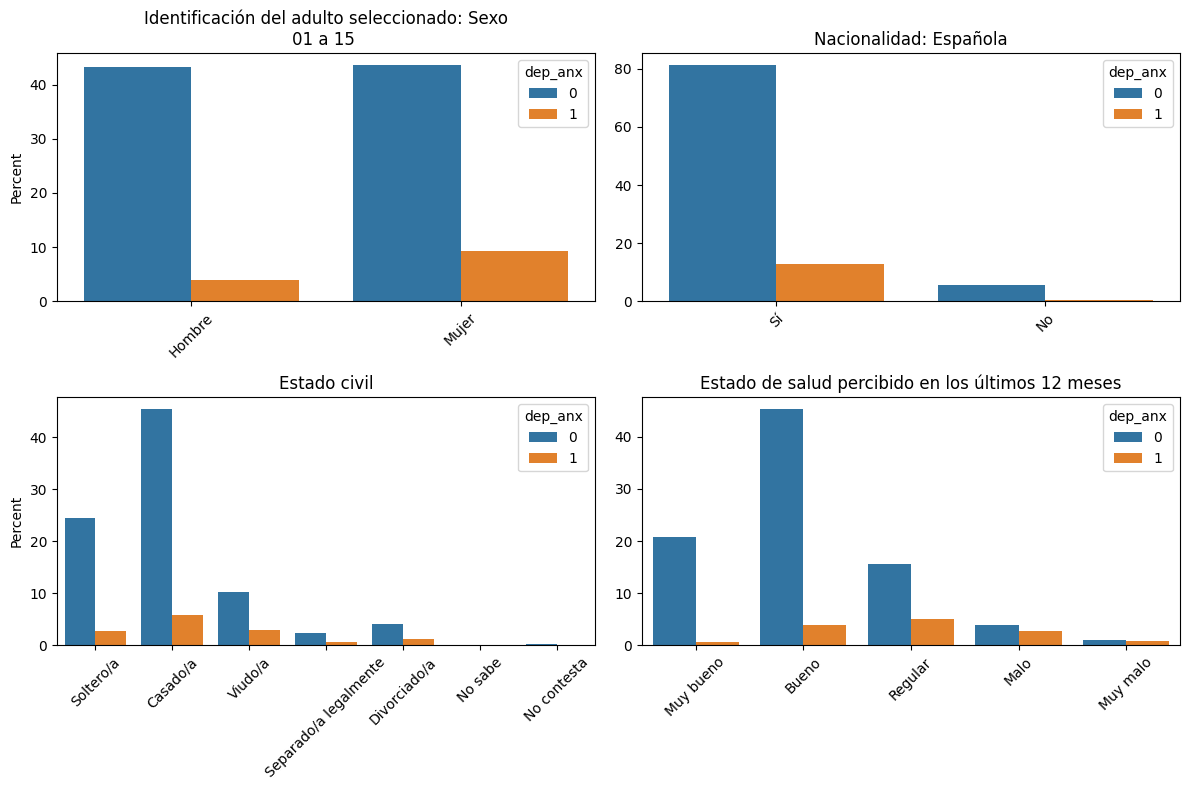

Target percentages:
dep_anx          0          1
SEXOa                        
1.0      91.742060   8.257940
2.0      82.443075  17.556925
dep_anx          0          1
E2_1a                        
1.0      86.501590  13.498410
2.0      91.856925   8.143075
dep_anx           0          1
E4b                           
1.0       90.112096   9.887904
2.0       88.682417  11.317583
3.0       77.658840  22.341160
4.0       80.461538  19.538462
5.0       78.021978  21.978022
8.0      100.000000        NaN
9.0       92.063492   7.936508
dep_anx          0          1
G21                          
1.0      97.128378   2.871622
2.0      92.111326   7.888674
3.0      75.375572  24.624428
4.0      58.941728  41.058272
5.0      56.641604  43.358396


In [398]:
vars=['SEXOa','E2_1a', 'E4b', 'G21']
cols=2
rows=((len(df[vars].columns) - 1) // cols) + 1
fig, axis = plt.subplots(rows, cols, figsize=(12, rows * 4))

for col, ax in zip(df[vars].columns , axis.flatten()):
  values, categories, title= parse_json(col)
  sns.countplot(data=df, x=col, hue = 'dep_anx', ax=ax, stat='percent')
  ax.set_title(title)
  ax.set_ylabel('')
  ax.set_xlabel('')
  ax.set_xticks(range(len(values)))
  ax.set_xticklabels(categories,  rotation=45) 

axis[0,0].set_ylabel('Percent')
axis[1,0].set_ylabel('Percent')


#removing empty subplots
for i in range(len(df[vars]), len(axis.flatten())):
      fig.delaxes(axis.flatten()[i])

plt.tight_layout()
plt.show()

print("Target percentages:")
for i in vars:
    percentage_dep_anx(i)

## Dependent variable versus depressive episodes, autonomous community, smoking status and frequency of alcohol comsumption

*   People reporting not ever experiencing a depressive episode suffer more from depression or anxiety (DoA), relative to the remainig categories
*   Aragon, Catalonia, Valencian Community, and Galicia are some of the communities with the highest percentages of DoA
*   Non-smokers also how a higher percentage of suffering from DoA as compared to smokers
*   Similarly, people who report never drinking suffer more from DoA

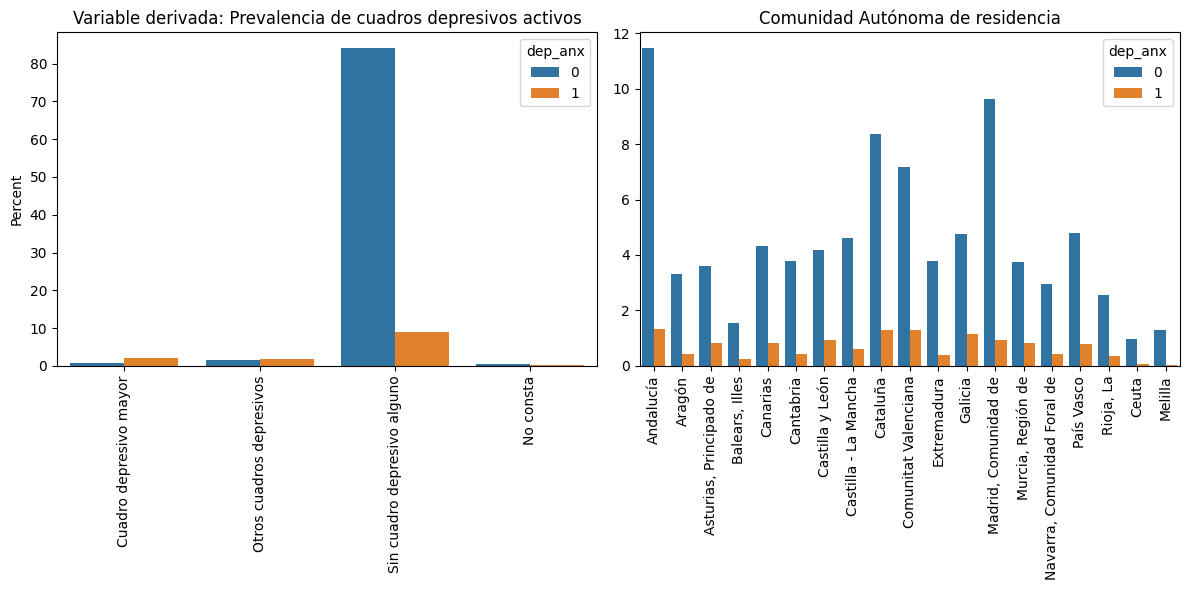

In [399]:
vars=['CUADROS_DEPRESIVOS', 'CCAA']
cols=2
rows=((len(df[vars].columns) - 1) // cols) + 1
fig, axis = plt.subplots(rows, cols, figsize=(12, rows * 6))

for col, ax in zip(df[vars].columns , axis.flatten()):
  values, categories, title= parse_json(col)
  sns.countplot(data=df, x=col, hue = 'dep_anx', ax=ax, stat='percent')
  ax.set_title(title)
  ax.set_ylabel('')
  ax.set_xlabel('')
  ax.set_xticks(range(len(values)))
  ax.set_xticklabels(categories,  rotation=90) 

axis[0].set_ylabel('Percent')

#removing empty subplots
for i in range(len(df[vars]), len(axis.flatten())):
      fig.delaxes(axis.flatten()[i])

plt.tight_layout()
plt.show()

# print("Target percentages:")
# for i in vars:
#      percentage_dep_anx(i)

/tmp/ipykernel_5281/914192491.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


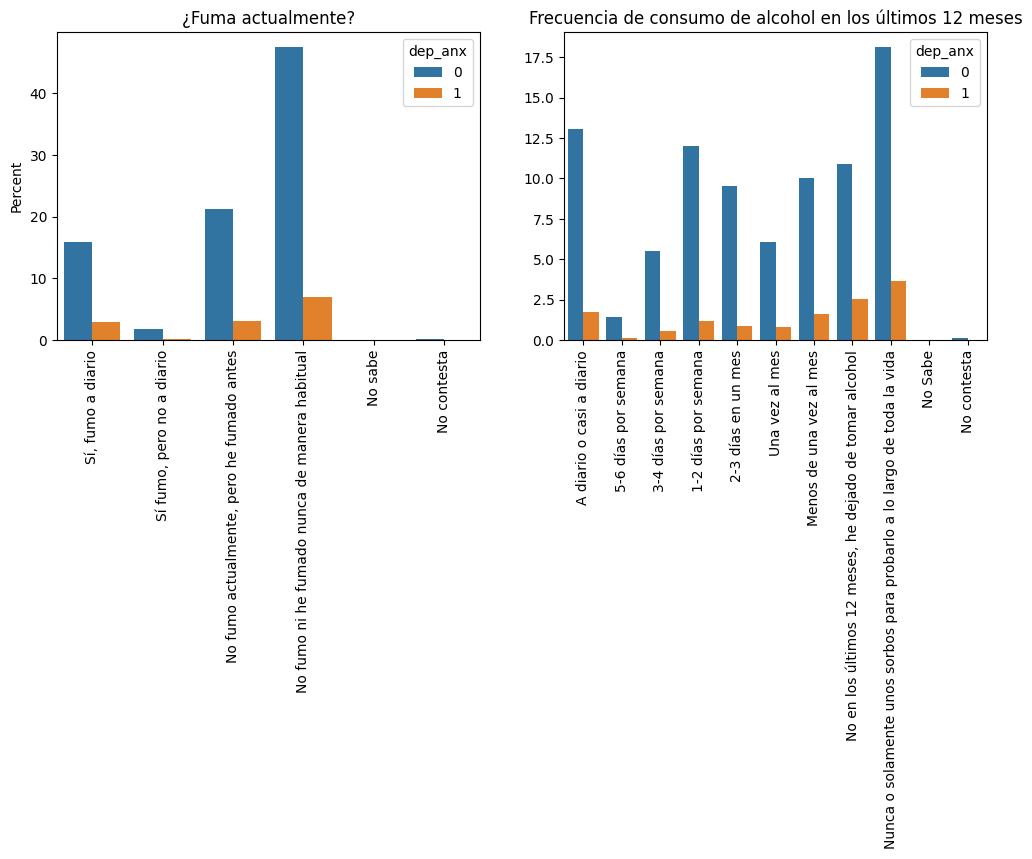

Target percentages:
dep_anx          0          1
V121                         
1.0      84.370512  15.629488
2.0      88.913043  11.086957
3.0      87.506972  12.493028
4.0      87.276358  12.723642
8.0      85.714286  14.285714
9.0      90.322581   9.677419
dep_anx          0          1
W127                         
1.0      88.143382  11.856618
2.0      91.040462   8.959538
3.0      90.430267   9.569733
4.0      90.962199   9.037801
5.0      91.775457   8.224543
6.0      88.479263  11.520737
7.0      86.259245  13.740755
8.0      80.936342  19.063658
9.0      83.174076  16.825924
98.0     85.714286  14.285714
99.0     82.142857  17.857143


In [400]:
vars=['V121', 'W127']
cols=2
rows=((len(df[vars].columns) - 1) // cols) + 1
fig, axis = plt.subplots(rows, cols, figsize=(12, rows * 4))

for col, ax in zip(df[vars].columns , axis.flatten()):
  values, categories, title= parse_json(col)
  sns.countplot(data=df, x=col, hue = 'dep_anx', ax=ax, stat='percent')
  ax.set_title(title)
  ax.set_ylabel('')
  ax.set_xlabel('')
  ax.set_xticks(range(len(values)))
  ax.set_xticklabels(categories,  rotation=90) 

axis[0].set_ylabel('Percent')

#removing empty subplots
for i in range(len(df[vars]), len(axis.flatten())):
      fig.delaxes(axis.flatten()[i])

plt.tight_layout()
plt.show()

print("Target percentages:")
for i in vars:
     percentage_dep_anx(i)

## Depression or anxiety versus eating habits

Among people who suffer from depression or anxiety (DoA):

*  A higher percentage of people who eat vegetable or fruits often, suffer from DoA
*  A higher percentage of people who never eat fast food, sugary drinks or snacks, suffer from DoA  

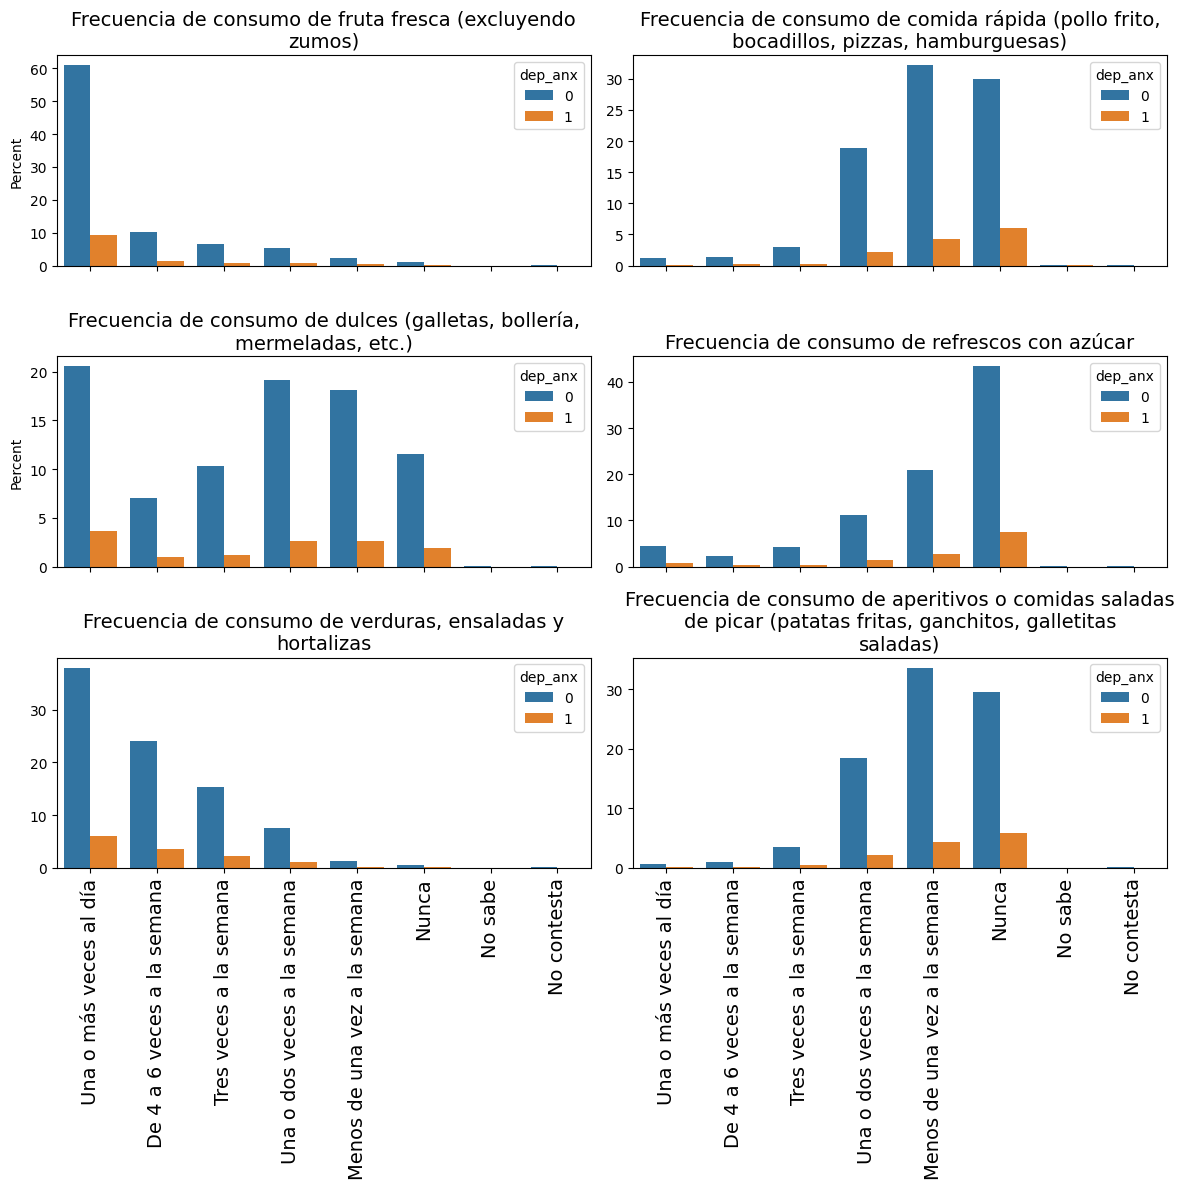

In [401]:
vars=['U120_1','U120_13', 'U120_11', 'U120_12', 'U120_7', 'U120_14']
cols=2
rows=((len(df[vars].columns) - 1) // cols) + 1
fig, axis = plt.subplots(rows, cols, figsize=(12, rows * 4))

for col, ax in zip(df[vars].columns , axis.flatten()):
  values, categories, title= parse_json(col)
  wrapped_title = "\n".join(textwrap.wrap(title, width=55)) 
  sns.countplot(data=df, x=col, hue = 'dep_anx', ax=ax, stat='percent')
  ax.set_title(wrapped_title, fontsize=14)
  ax.set_ylabel('')
  ax.set_xlabel('')
  #ax.set_xticks(range(len(values)))
  ax.set_xticklabels('') 

axis[0,0].set_ylabel('Percent')
axis[1,0].set_ylabel('Percent')
axis[2,0].set_xticks(range(len(values)))
axis[2,0].set_xticklabels(categories,  rotation=90, fontsize=14) 
axis[2,1].set_xticks(range(len(values)))
axis[2,1].set_xticklabels(categories,  rotation=90, fontsize=14) 

#removing empty subplots
for i in range(len(df[vars]), len(axis.flatten())):
      fig.delaxes(axis.flatten()[i])

plt.tight_layout()
plt.show()

# print("Target percentages:")
# for i in vars:
#      percentage_dep_anx(i)

## Depression/Anxiety versus life habits

For variable V123, we perform a query to filter out the extreme values, coded as 98 and 99, which represent NAs, in order to obtain a cleaner graph.

* People with depression or anxiety (DoA) do not excercise often
* DoA is prevalent across most levels of obesity  
* There is no consistent pattern between smoking and having DoA 

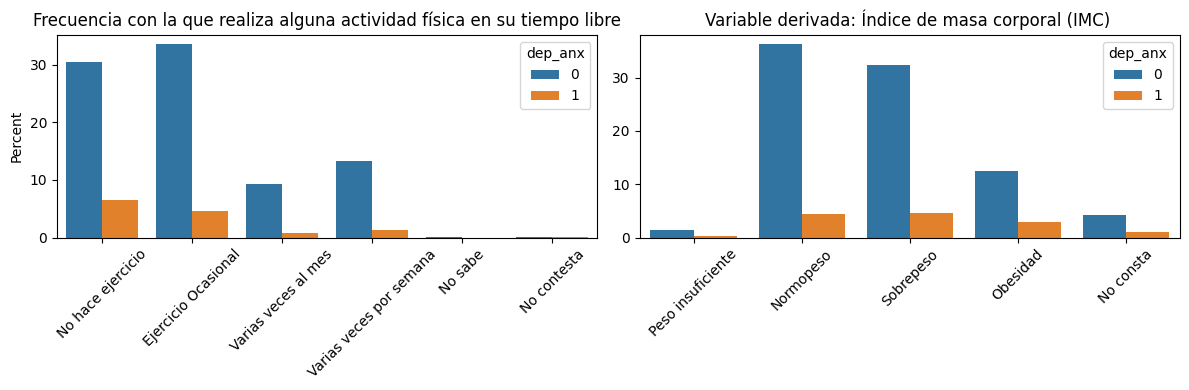

In [402]:
vars=2
cols=2
rows=((vars - 1) // cols) + 1
fig, axis = plt.subplots(rows, cols, figsize=(12, rows * 4))
vars=['T112','IMC']
for col, ax in zip(df[vars].columns , axis.flatten()):
  values, categories, title= parse_json(col)
  sns.countplot(data=df, x=col, hue = 'dep_anx', ax=ax, stat='percent')
  ax.set_title(title)
  ax.set_ylabel('')
  ax.set_xlabel('')
  ax.set_xticks(range(len(values)))
  ax.set_xticklabels(categories,  rotation=45)

axis[0].set_ylabel('Percent')
axis[0].set_xticks(range(6))
axis[0].set_xticklabels(['No hace ejercicio', 'Ejercicio Ocasional', 'Varias veces al mes', 'Varias veces por semana', 'No sabe', 'No contesta'],  rotation=45)

plt.tight_layout()
plt.show()

In [403]:
# _,categories_1, _ = parse_json('CCAA')

# plt.figure(figsize=(12, 8))

# sns.barplot(x='CCAA', y='W127', data=df, color='skyblue', errorbar=None, label='Alcohol')
# sns.barplot(x='CCAA', y='V121', data=df, color='lightcoral', errorbar=None, label='Tabaco')
# plt.xticks(range(len(categories_1)), categories_1, rotation=45, ha='right')
# plt.ylabel(None)
# plt.show()

In [404]:
def cambiar_nombres_desde_json(dataframe, ruta_json):
    # Compruebo que puedo cargar el JSON
    with open(ruta_json, 'r') as file:
        nombres_nuevos = json.load(file)

    df_con_nombres = dataframe.copy()  # Crear una copia del DataFrame para evitar modificar el original
    
    for columna in dataframe.columns:
        nuevo_nombre = nombres_nuevos.get(columna, {}).get('Descripción', columna)
        df_con_nombres.rename(columns={columna:f'{columna};{nuevo_nombre}' }, inplace=True)

    return df_con_nombres

# Split Train test

After conducting the data split into train and text and aplying the selectkbest option to keep the 50 most relevant variables, we observe no diversity in the selected data. The latter is problematic as having variety in the information will help the model to better predict the outcome variable. The variables selected with selectkbest, they all capture very similar information health problems and even variables that have information about the same health condition:

In [405]:
# We divide the dataset into training and test samples.
X = clean_df.drop("dep_anx", axis = 1)
y = clean_df["dep_anx"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# With a value of k = 5 we implicitly mean that we want to remove 2 features from the dataset
selection_model = SelectKBest(f_classif, k = 50)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()


X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

cambiar_nombres_desde_json(X_train_sel, '../data/json_files/var_dict.json').columns



Index(['G21;Estado de salud percibido en los últimos 12 meses',
       'G22;Enfermedad o problema de salud crónicos o de larga duración',
       'G23;Grado de limitación durante al menos 6 meses por un problema de salud',
       'G24a;Estado de salud bucodental',
       'G25a_5;Ha padecido alguna vez: Varices en las piernas',
       'G25b_5;Ha padecido en los últimos 12 meses: Varices en las piernas',
       'G25a_6;Ha padecido alguna vez: Artrosis (excluyendo artritis)',
       'G25b_6;Ha padecido en los últimos 12 meses: Artrosis (excluyendo artritis)',
       'G25c_6;Diagnóstico médico: Artrosis (excluyendo artritis)',
       'G25a_7;Ha padecido alguna vez: Dolor de espalda crónico (cervical)',
       'G25b_7;Ha padecido en los últimos 12 meses: Dolor de espalda crónico (cervical)',
       'G25c_7;Diagnóstico médico: Dolor de espalda crónico (cervical)',
       'G25a_8;Ha padecido alguna vez: Dolor de espalda crónico (lumbar)',
       'G25b_8;Ha padecido en los últimos 12 meses: Dol

To address the issue mentioned above, we will now delete variables that ask questions about the same medical condition and only keep one. 
For instance, instead of having 3 variables about chronic back pain, we will only keep the one asking whether the person has ever suffered of chronic back pain

In [406]:
lista_medicas = ['G25b_1',
 'G25b_2',
 'G25b_3',
 'G25b_4',
 'G25b_5',
 'G25b_6',
 'G25b_7',
 'G25b_8',
 'G25b_9',
 'G25b_10',
 'G25b_11',
 'G25b_12',
 'G25b_13',
 'G25b_14',
 'G25b_15',
 'G25b_16',
 'G25b_17',
 'G25b_18',
 'G25b_19',
 'G25b_22',
 'G25b_23',
 'G25b_24',
 'G25b_25',
 'G25b_26',
 'G25b_27',
 'G25b_28',
 'G25b_29',
 'G25b_30',
 'G25b_31',
 'G25b_32',
 'G25c_1',
 'G25c_2',
 'G25c_3',
 'G25c_4',
 'G25c_5',
 'G25c_6',
 'G25c_7',
 'G25c_8',
 'G25c_9',
 'G25c_10',
 'G25c_11',
 'G25c_12',
 'G25c_13',
 'G25c_14',
 'G25c_15',
 'G25c_16',
 'G25c_17',
 'G25c_18',
 'G25c_19',
 'G25c_22',
 'G25c_23',
 'G25c_24',
 'G25c_25',
 'G25c_26',
 'G25c_27',
 'G25c_28',
 'G25c_29',
 'G25c_30',
 'G25c_31',
 'G25c_32',
 'P87_14a',
 'P87_14b',
 'P85','P86']

In [407]:
clean_df.drop(lista_medicas, axis=1, inplace=True)

The variables capturing information of whether the person medicines prescribed  or not prescribed or can be regropued as only one variable, to avoid repetition. 

For instance: 

Question P78_1a asks whether the person has taken ***unprescribed*** flu medicine

Question P78_1b asks whether the person has taken ***prescribed*** flu medicine

With the following code we will now combine these two variables into one to reflect comsumption of prescribed or unprescribed medicine and convet it into a binary variable


In [408]:
lista_preescrip = ['P87_1a',
 'P87_1b',
 'P87_2a',
 'P87_2b',
 'P87_3a',
 'P87_3b',
 'P87_4a',
 'P87_4b',
 'P87_5a',
 'P87_5b',
 'P87_6a',
 'P87_6b',
 'P87_7a',
 'P87_7b',
 'P87_8a',
 'P87_8b',
 'P87_9a',
 'P87_9b',
 'P87_10a',
 'P87_10b',
 'P87_11a',
 'P87_11b',
 'P87_12a',
 'P87_12b',
 'P87_13a',
 'P87_13b',
 'P87_15a',
 'P87_15b',
 'P87_16a',
 'P87_16b',
 'P87_17a',
 'P87_17b',
 'P87_18a',
 'P87_18b',
 'P87_19a',
 'P87_19b',
 'P87_20a',
 'P87_20b',
 'P87_21a',
 'P87_21b',
 'P87_22a',
 'P87_22b',
 'P87_23a',
 'P87_23b']

In [409]:
nombres_termina_a = []
nombres_termina_b = []

# Iterates over the original list lista_preescrip
for nombre in lista_preescrip:
    # Verifies if variable name ends with 'a'
    if nombre.endswith('a') or nombre.endswith('A'):
        nombres_termina_a.append(nombre)
    # Verifies if variable name ends with 'b'
    elif nombre.endswith('b') or nombre.endswith('B'):
        nombres_termina_b.append(nombre)

In [410]:
def quedarme_con_los_unos(dataframe,a, b):
    dataframe[f'{a}_nuevo'] = 0
    dataframe.loc[(df[a] == 1) | (dataframe[b] == 1), f'{a}_nuevo'] = 1
    dataframe[f'{a}_nuevo'] = (dataframe[f'{a}_nuevo'] == 1).astype(int)


In [411]:
for a, b in zip(nombres_termina_a, nombres_termina_b):
    quedarme_con_los_unos(clean_df,a,b)

    clean_df.drop([a,b], axis=1, inplace=True)

After deleting and/or combining variables, the new dataset contains 190 columns:

In [412]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22072 entries, 0 to 22071
Columns: 187 entries, CCAA to P87_23a_nuevo
dtypes: float64(61), int64(126)
memory usage: 31.5 MB


Here just double checking the conversion into binary format worked:

In [413]:
nuevas_columnas = clean_df.filter(like='nuevo', axis=1)
nuevas_columnas

,P87_1a_nuevo,P87_2a_nuevo,P87_3a_nuevo,P87_4a_nuevo,P87_5a_nuevo,P87_6a_nuevo,P87_7a_nuevo,P87_8a_nuevo,P87_9a_nuevo,P87_10a_nuevo,...,P87_13a_nuevo,P87_15a_nuevo,P87_16a_nuevo,P87_17a_nuevo,P87_18a_nuevo,P87_19a_nuevo,P87_20a_nuevo,P87_21a_nuevo,P87_22a_nuevo,P87_23a_nuevo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22067,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22068,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22069,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
22070,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [414]:
clean_df.to_csv('../data/interim/df_final_V2.csv',index=False)

# Split and select k best 2.0

With a cleaner dataset we will now procede to apply the selectkbest:

In [415]:
#We delete these variables for the X dataset as they are captured in y:
lista_a_eliminar = ['SEVERIDAD_DEPRESIVA', 'CUADROS_DEPRESIVOS', "dep_anx"]

# We divide the dataset into training and test samples.
X = clean_df.drop(lista_a_eliminar, axis = 1)
y = clean_df["dep_anx"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

# With a value of k = 5 we implicitly mean that we want to remove 2 features from the dataset
selection_model = SelectKBest(f_classif, k = 50)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()


X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

cambiar_nombres_desde_json(X_train_sel, '../data/json_files/var_dict.json').columns



Index(['SEXOa;Identificación del adulto seleccionado: Sexo\n01 a 15 ',
       'EDADa;Identificación del adulto seleccionado: Edad. De 015 a 120',
       'ESTUDIOS;Nivel de estudios del adulto seleccionado',
       'G21;Estado de salud percibido en los últimos 12 meses',
       'G22;Enfermedad o problema de salud crónicos o de larga duración',
       'G23;Grado de limitación durante al menos 6 meses por un problema de salud',
       'G24a;Estado de salud bucodental',
       'G25a_1;Ha padecido alguna vez: Tensión alta',
       'G25a_5;Ha padecido alguna vez: Varices en las piernas',
       'G25a_6;Ha padecido alguna vez: Artrosis (excluyendo artritis)',
       'G25a_7;Ha padecido alguna vez: Dolor de espalda crónico (cervical)',
       'G25a_8;Ha padecido alguna vez: Dolor de espalda crónico (lumbar)',
       'G25a_11;Ha padecido alguna vez: Bronquitis crónica, enfisema, enfermedad pulmonar obstructiva crónica (EPOC)',
       'G25a_14;Ha padecido alguna vez: Incontinencia urinaria o pro

In [416]:
X_train_sel.to_csv("../data/processed/X_train.csv", index=False)
X_test_sel.to_csv("../data/processed/X_test.csv", index=False)

In [417]:
y_train.to_csv("../data/processed/y_train.csv", index=False)
y_test.to_csv("../data/processed/y_test.csv", index=False)